In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [9]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [11]:
# Пропуски по столбцам
missing = df.isna().mean()
print(missing)


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [12]:
# Количество полных дубликатов строк
dup_count = df.duplicated().sum()
print("Количество дубликатов:", dup_count)


Количество дубликатов: 1


In [13]:
# Подозрительные значения
suspect_age = df[(df["age"] < 10) | (df["age"] > 100)]
suspect_purchases = df[df["purchases"] < 0]

suspect_age, suspect_purchases


(    user_id    age country  purchases  revenue
 5         6  120.0      FR         -1      785
 20       21    5.0      RU          8     1488,
    user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785)

В датасете есть пропуски по возрасту, из‑за этого для части людей age не указан. Нашёл несколько подозрительных значений: возраст 120 и 5 лет, а также отрицательное количество покупок. Есть дубликат строки с одним и тем же user_id, который может искажать статистику.

In [14]:
df["country"].value_counts()


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [15]:
group_stats = df.groupby("country")[["purchases", "revenue"]].agg(["count", "mean", "sum"])
group_stats


purchases               revenue                    
            count      mean sum   count         mean    sum
country                                                    
CN              2  4.500000   9       2  1054.000000   2108
DE              6  6.500000  39       6  1445.500000   8673
FR             12  4.250000  51      12   675.916667   8111
RU             13  4.769231  62      13   790.076923  10271
US              8  4.625000  37       8   557.375000   4459

Чаще всего в данных встречаются пользователи из России и Франции, меньше всего строк по Китаю и Германии. Средний revenue выше всего у клиентов из Германии и части пользователей из Франции, у России и США значения заметно ниже. В целом видно, что страны отличаются и по числу записей, и по средней выручке.

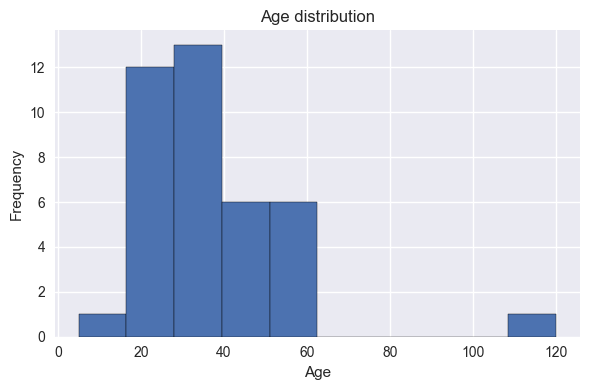

In [18]:
# Гистограмма по возрасту
plt.figure(figsize=(6,4))
plt.hist(df["age"].dropna(), bins=10, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.tight_layout()
plt.savefig("figures/hist_age.png")
plt.show()


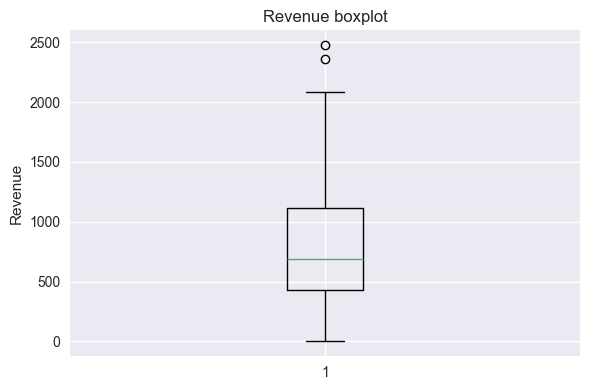

In [19]:
# Boxplot по revenue
plt.figure(figsize=(6,4))
plt.boxplot(df["revenue"].dropna())
plt.ylabel("Revenue")
plt.title("Revenue boxplot")
plt.tight_layout()
plt.savefig("figures/box_revenue.png")
plt.show()


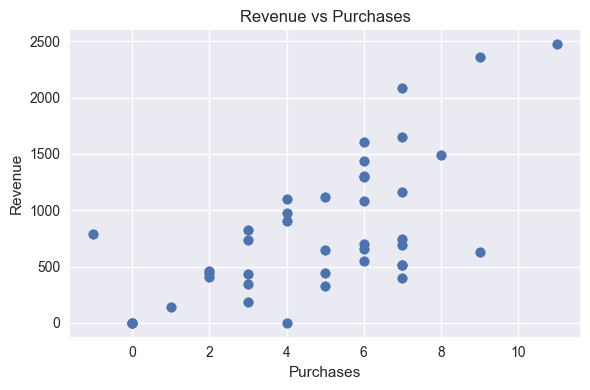

In [20]:
# Scatter purchases vs revenue
plt.figure(figsize=(6,4))
plt.scatter(df["purchases"], df["revenue"])
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.title("Revenue vs Purchases")
plt.tight_layout()
plt.savefig("figures/scatter_purchases_revenue.png")
plt.show()
